In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 환경설정

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
import joblib
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# 데이터 체크
- 사전 처리된 데이터 인계 : 인사평가_피쳐생성.csv
- data 결측치 0건(전처리 완)

In [3]:
data = pd.read_csv("인사평가_피쳐생성.csv")
data

,나이,출장,참여프로젝트,근속연차,월급,이직회수,업무평가,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이
0,41,1~29회,3,2,8090550,8,보통,1,8,0,6,1,1.000000,0.375000,0.000000,0.750000,1.011319e+06,2696850.0,6,-4,0.375000,2,8090550,0.195122,0.048780,197330.487805,33
1,49,30회 이상,2,2,6925500,1,좋다,4,10,3,10,2,0.100000,0.200000,0.300000,1.000000,6.925500e+05,3462750.0,8,-8,0.500000,8,27702000,0.204082,0.040816,141336.734694,39
2,37,1~29회,2,1,2821500,6,보통,2,7,3,0,1,0.857143,0.285714,0.428571,0.000000,4.030714e+05,1410750.0,6,1,0.714286,2,5643000,0.189189,0.027027,76256.756757,30
3,33,30회 이상,3,1,3927150,1,보통,3,8,3,8,2,0.125000,0.375000,0.375000,1.000000,4.908938e+05,1309050.0,7,-7,0.750000,3,11781450,0.242424,0.030303,119004.545455,25
4,27,1~29회,3,1,4681800,9,보통,4,6,3,2,1,1.500000,0.500000,0.500000,0.333333,7.803000e+05,1560600.0,5,-1,1.000000,4,18727200,0.222222,0.037037,173400.000000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,30회 이상,4,2,3470850,4,보통,3,17,3,5,2,0.235294,0.235294,0.176471,0.294118,2.041676e+05,867712.5,15,-3,0.411765,6,10412550,0.472222,0.055556,96412.500000,19
1466,39,1~29회,2,3,13487850,4,보통,1,9,5,7,1,0.444444,0.222222,0.555556,0.777778,1.498650e+06,6743925.0,6,-4,0.777778,3,13487850,0.230769,0.076923,345842.307692,30
1467,27,1~29회,4,2,8291700,1,좋다,2,6,0,6,1,0.166667,0.666667,0.000000,1.000000,1.381950e+06,2072925.0,4,-4,0.666667,4,16583400,0.222222,0.074074,307100.000000,21
1468,49,30회 이상,2,2,7276500,2,보통,4,17,3,9,2,0.117647,0.117647,0.176471,0.529412,4.280294e+05,3638250.0,15,-7,0.294118,8,29106000,0.346939,0.040816,148500.000000,32


In [13]:
data.info() # 출장, 업무평가 object 타입, 결측치 0건

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   나이         1470 non-null   int64  
 1   출장         1470 non-null   object 
 2   참여프로젝트     1470 non-null   int64  
 3   근속연차       1470 non-null   int64  
 4   월급         1470 non-null   int64  
 5   이직회수       1470 non-null   int64  
 6   업무평가       1470 non-null   object 
 7   주변평가       1470 non-null   int64  
 8   경력         1470 non-null   int64  
 9   전년도교육출장횟수  1470 non-null   int64  
 10  현회사근속년수    1470 non-null   int64  
 11  출장_등급      1470 non-null   int64  
 12  이직률        1470 non-null   float64
 13  프로젝트참여율    1470 non-null   float64
 14  교육출장참여율    1470 non-null   float64
 15  현직근속비율     1470 non-null   float64
 16  연봉/경력비율    1470 non-null   float64
 17  연봉/프로젝트비율  1470 non-null   float64
 18  경력-근속연차    1470 non-null   int64  
 19  근속연차차이     1470 non-null   int64  
 20  프로젝트밀도지수

나이             int64
출장            object
참여프로젝트         int64
근속연차           int64
월급             int64
이직회수           int64
업무평가          object
주변평가           int64
경력             int64
전년도교육출장횟수      int64
현회사근속년수        int64
출장_등급          int64
이직률          float64
프로젝트참여율      float64
교육출장참여율      float64
현직근속비율       float64
연봉/경력비율      float64
연봉/프로젝트비율    float64
경력-근속연차        int64
근속연차차이         int64
프로젝트밀도지수     float64
평판×근속연차        int64
연봉×평판점수        int64
경력/나이비율      float64
근속/나이비율      float64
연봉/나이        float64
입사나이           int64
dtype: object

In [15]:
data.select_dtypes('object').columns

Index(['출장', '업무평가'], dtype='object')

In [6]:
data.describe() # numeric 값만 체크

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이
count,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,2.063946,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,1.086395,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218
std,9.135373,0.711561,1.106940,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.532170,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481
min,18.000000,1.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000
25%,30.000000,2.000000,1.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,1.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000
50%,36.000000,3.000000,2.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,1.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000
75%,43.000000,3.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,1.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000
max,60.000000,4.000000,5.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,2.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000


In [25]:
print(data.select_dtypes('object')['출장'].value_counts())
print("-"*50)
print(data.select_dtypes('object')['업무평가'].value_counts())

1~29회     1043
30회 이상     277
0회         150
Name: 출장, dtype: int64
--------------------------------------------------
보통    1244
좋다     226
Name: 업무평가, dtype: int64


# 데이터 상관계수 및 시각화

## 우선 업무평가, 출장을 라벨링해 전체를 체크 필요
- 업무평가는 0, 1 : 보통과 좋다로 분류되며 서열이 있어 일반 labeling 보다 Ordinal Labeling
- 출장 또한 0회 / 1 ~ 29회 / 30회 이상으로 분류되며 이에 따라서 Ordinal Labeling 필요

In [41]:
def ordinalEncoding(row) : 
    row = row.copy()
    manager_dict = {"보통":0, "좋다":1}
    if row['출장'] == "1~29회" :
        row['출장odm'] = 1
    elif row['출장'] == "30회 이상" :
        row['출장odm'] = 2
    else :
        row['출장odm'] = 0
    row['업무평가odm'] = manager_dict.get(row['업무평가'])
    return row

ordinalEncoding(data.iloc[0]) # ok

나이                      41
출장                   1~29회
참여프로젝트                   3
근속연차                     2
월급                 8090550
이직회수                     8
업무평가                    보통
주변평가                     1
경력                       8
전년도교육출장횟수                0
현회사근속년수                  6
출장_등급                    1
이직률                    1.0
프로젝트참여율              0.375
교육출장참여율                0.0
현직근속비율                0.75
연봉/경력비율         1011318.75
연봉/프로젝트비율        2696850.0
경력-근속연차                  6
근속연차차이                  -4
프로젝트밀도지수             0.375
평판×근속연차                  2
연봉×평판점수            8090550
경력/나이비율           0.195122
근속/나이비율            0.04878
연봉/나이        197330.487805
입사나이                    33
출장odm                    1
업무평가odm                  0
Name: 0, dtype: object

In [42]:
data_odm = data.apply(ordinalEncoding, axis=1)
data_odm

,나이,출장,참여프로젝트,근속연차,월급,이직회수,업무평가,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm,업무평가odm
0,41,1~29회,3,2,8090550,8,보통,1,8,0,6,1,1.000000,0.375000,0.000000,0.750000,1.011319e+06,2696850.0,6,-4,0.375000,2,8090550,0.195122,0.048780,197330.487805,33,1,0
1,49,30회 이상,2,2,6925500,1,좋다,4,10,3,10,2,0.100000,0.200000,0.300000,1.000000,6.925500e+05,3462750.0,8,-8,0.500000,8,27702000,0.204082,0.040816,141336.734694,39,2,1
2,37,1~29회,2,1,2821500,6,보통,2,7,3,0,1,0.857143,0.285714,0.428571,0.000000,4.030714e+05,1410750.0,6,1,0.714286,2,5643000,0.189189,0.027027,76256.756757,30,1,0
3,33,30회 이상,3,1,3927150,1,보통,3,8,3,8,2,0.125000,0.375000,0.375000,1.000000,4.908938e+05,1309050.0,7,-7,0.750000,3,11781450,0.242424,0.030303,119004.545455,25,2,0
4,27,1~29회,3,1,4681800,9,보통,4,6,3,2,1,1.500000,0.500000,0.500000,0.333333,7.803000e+05,1560600.0,5,-1,1.000000,4,18727200,0.222222,0.037037,173400.000000,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,30회 이상,4,2,3470850,4,보통,3,17,3,5,2,0.235294,0.235294,0.176471,0.294118,2.041676e+05,867712.5,15,-3,0.411765,6,10412550,0.472222,0.055556,96412.500000,19,2,0
1466,39,1~29회,2,3,13487850,4,보통,1,9,5,7,1,0.444444,0.222222,0.555556,0.777778,1.498650e+06,6743925.0,6,-4,0.777778,3,13487850,0.230769,0.076923,345842.307692,30,1,0
1467,27,1~29회,4,2,8291700,1,좋다,2,6,0,6,1,0.166667,0.666667,0.000000,1.000000,1.381950e+06,2072925.0,4,-4,0.666667,4,16583400,0.222222,0.074074,307100.000000,21,1,1
1468,49,30회 이상,2,2,7276500,2,보통,4,17,3,9,2,0.117647,0.117647,0.176471,0.529412,4.280294e+05,3638250.0,15,-7,0.294118,8,29106000,0.346939,0.040816,148500.000000,32,2,0


### 불필요 컬럼(라벨링 전 컬럼들) 제거

In [45]:
data = data_odm.drop(['출장','업무평가'], axis=1)
data

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm,업무평가odm
0,41,3,2,8090550,8,1,8,0,6,1,1.000000,0.375000,0.000000,0.750000,1.011319e+06,2696850.0,6,-4,0.375000,2,8090550,0.195122,0.048780,197330.487805,33,1,0
1,49,2,2,6925500,1,4,10,3,10,2,0.100000,0.200000,0.300000,1.000000,6.925500e+05,3462750.0,8,-8,0.500000,8,27702000,0.204082,0.040816,141336.734694,39,2,1
2,37,2,1,2821500,6,2,7,3,0,1,0.857143,0.285714,0.428571,0.000000,4.030714e+05,1410750.0,6,1,0.714286,2,5643000,0.189189,0.027027,76256.756757,30,1,0
3,33,3,1,3927150,1,3,8,3,8,2,0.125000,0.375000,0.375000,1.000000,4.908938e+05,1309050.0,7,-7,0.750000,3,11781450,0.242424,0.030303,119004.545455,25,2,0
4,27,3,1,4681800,9,4,6,3,2,1,1.500000,0.500000,0.500000,0.333333,7.803000e+05,1560600.0,5,-1,1.000000,4,18727200,0.222222,0.037037,173400.000000,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,4,2,3470850,4,3,17,3,5,2,0.235294,0.235294,0.176471,0.294118,2.041676e+05,867712.5,15,-3,0.411765,6,10412550,0.472222,0.055556,96412.500000,19,2,0
1466,39,2,3,13487850,4,1,9,5,7,1,0.444444,0.222222,0.555556,0.777778,1.498650e+06,6743925.0,6,-4,0.777778,3,13487850,0.230769,0.076923,345842.307692,30,1,0
1467,27,4,2,8291700,1,2,6,0,6,1,0.166667,0.666667,0.000000,1.000000,1.381950e+06,2072925.0,4,-4,0.666667,4,16583400,0.222222,0.074074,307100.000000,21,1,1
1468,49,2,2,7276500,2,4,17,3,9,2,0.117647,0.117647,0.176471,0.529412,4.280294e+05,3638250.0,15,-7,0.294118,8,29106000,0.346939,0.040816,148500.000000,32,2,0


In [46]:
corrs = data.corr(numeric_only=True)

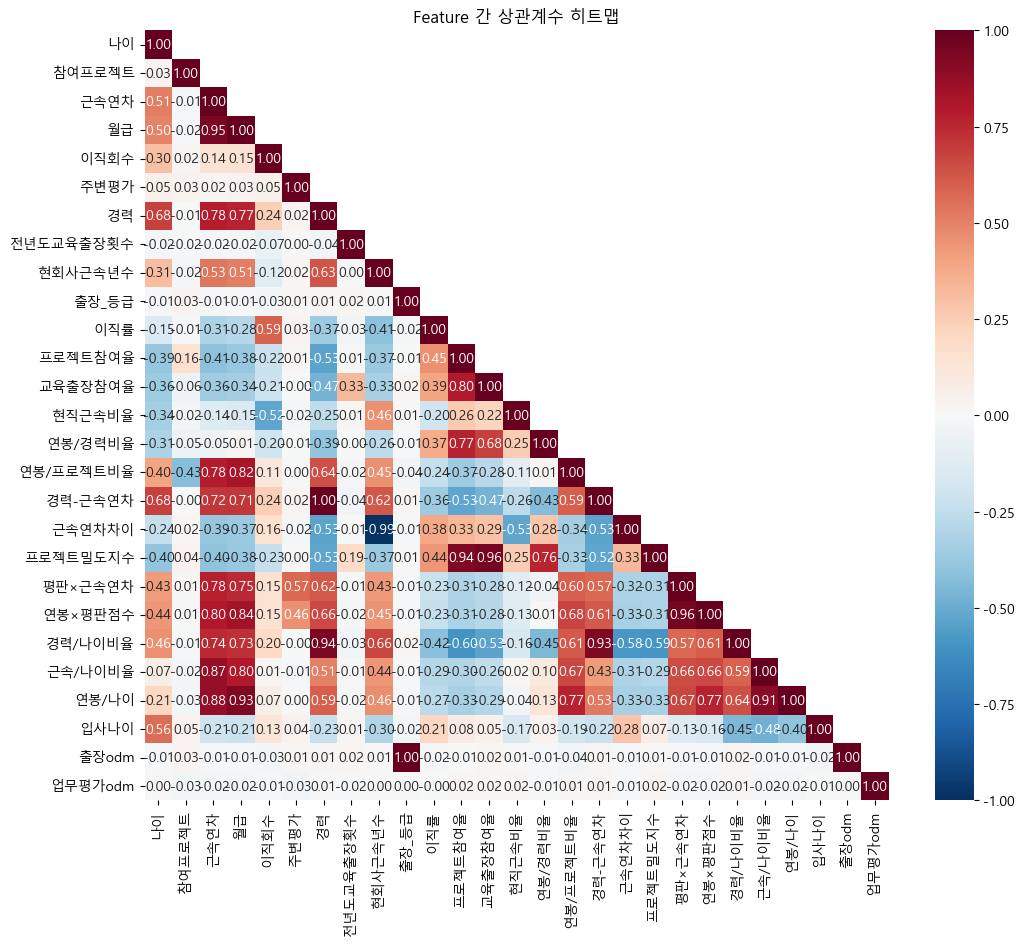

In [47]:
mask = np.triu(np.ones_like(corrs, dtype=bool), k=1)
plt.figure(figsize=(12,10))
sns.heatmap(corrs, annot=True,mask=mask, fmt='.2f', cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Feature 간 상관계수 히트맵')
plt.show()

In [48]:
corrs['업무평가odm']

나이           0.001904
참여프로젝트      -0.029071
근속연차        -0.021222
월급          -0.017120
이직회수        -0.014095
주변평가        -0.031351
경력           0.006744
전년도교육출장횟수   -0.015579
현회사근속년수      0.003435
출장_등급        0.001683
이직률         -0.004408
프로젝트참여율      0.020697
교육출장참여율      0.015005
현직근속비율       0.021166
연봉/경력비율     -0.012695
연봉/프로젝트비율    0.008813
경력-근속연차      0.010931
근속연차차이      -0.007934
프로젝트밀도지수     0.018527
평판×근속연차     -0.021645
연봉×평판점수     -0.017798
경력/나이비율      0.009810
근속/나이비율     -0.019072
연봉/나이       -0.017191
입사나이        -0.005102
출장odm        0.001683
업무평가odm      1.000000
Name: 업무평가odm, dtype: float64

### 상관계수는 모두 절대값 0.03 이하로, 선형회귀 형태 분석은 불가에 가까움

# 데이터 분리

In [57]:
from sklearn.model_selection import train_test_split
# train세트 구분
y = data['업무평가odm']
X = data.copy().drop('업무평가odm',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,stratify=y, train_size=0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 26), (441, 26), (1029,), (441,))

# RandomForest : Scaling 전, class_weight=None

In [80]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
pred = rf_model.predict_proba(X_test)

In [82]:
pred.argmax(axis=1)
np.array(Y_test)
from sklearn.metrics import accuracy_score
print("정확도",accuracy_score(np.array(Y_test),pred.argmax(axis=1)))
pd.crosstab(np.array(Y_test),pred.argmax(axis=1),rownames=['실제값'],colnames=['예측값'])

정확도 0.8344671201814059


예측값,0,1
실제값,,
0,367,6
1,67,1


# 정확도는 83.4%로 양호하지만 1(좋다)에 대한 precision이 14.2%로 몹시 낮음

# Feature_importance_ 점검

In [97]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                       columns=['feature','importance'])
features['importance'].sum()

1.0

In [98]:
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)

In [105]:
# 중요도를 단순하게 평균내었을 때 평균값보다 작은 feature 점검
features[features['importance']<=1/len(features.feature)]

,feature,importance
14,현회사근속년수,0.034572
15,근속연차차이,0.032976
16,전년도교육출장횟수,0.028845
17,경력-근속연차,0.028626
18,경력,0.026187
19,평판×근속연차,0.021513
20,주변평가,0.021322
21,이직회수,0.020653
22,출장_등급,0.015574
23,참여프로젝트,0.015553


## 근속연차의 중요도가 0.6%로 제거 고려

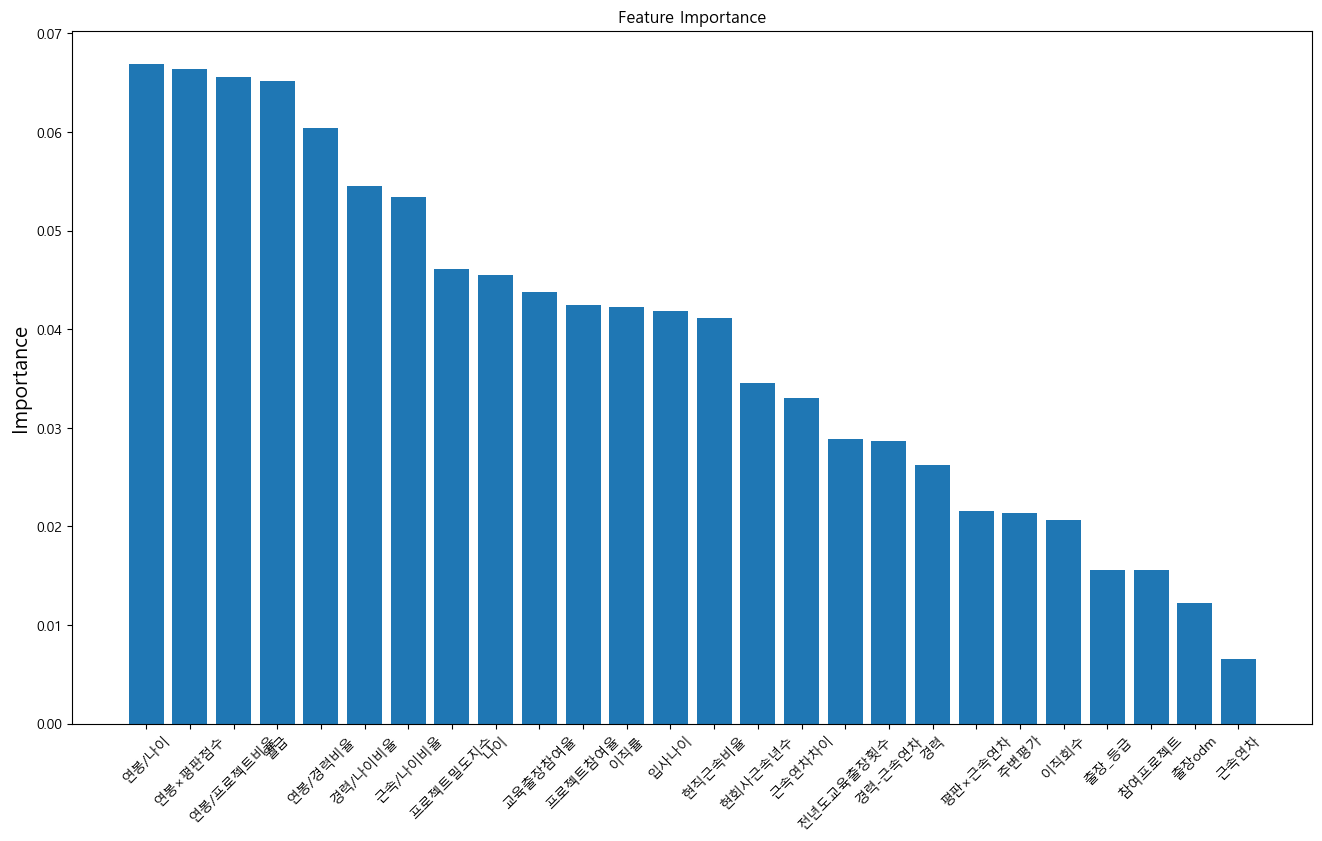

In [101]:
# features
plt.figure(figsize=(16,9))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Importance', fontsize=15)
plt.title("Feature Importance")
plt.show()

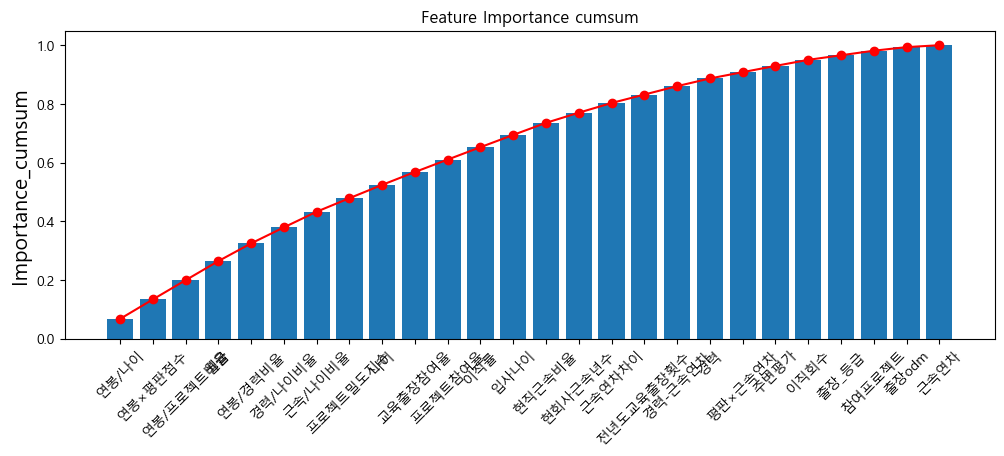

In [102]:
# features.importance 누적합

y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

plt.figure(figsize=(12,4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red',marker='o')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Importance_cumsum', fontsize=15)
plt.title("Feature Importance cumsum")
plt.show()

# 연봉 등 데이터를 정규화 해서 다시 시도

## 데이터 체크 : 평균값이 1 이상인 값에 대해 스케일링을 위함

In [198]:
X_data = data_odm.drop('업무평가odm', axis=1)
stats_df = X_data.describe()
stats_df

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
count,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,2.063946,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,1.086395,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218,1.086395
std,9.135373,0.711561,1.106940,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.532170,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481,0.532170
min,18.000000,1.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000,0.000000
25%,30.000000,2.000000,1.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,1.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000,1.000000
50%,36.000000,3.000000,2.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,1.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000,1.000000
75%,43.000000,3.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,1.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000,1.000000
max,60.000000,4.000000,5.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,2.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000,2.000000


In [199]:
cols_over1 = stats_df.loc['mean'] >= 1
cols_over1 = cols_over1[cols_over1].index.tolist()
print("평균값이 1 이상인 컬럼:", cols_over1)

평균값이 1 이상인 컬럼: ['나이', '참여프로젝트', '근속연차', '월급', '이직회수', '주변평가', '경력', '전년도교육출장횟수', '현회사근속년수', '출장_등급', '연봉/경력비율', '연봉/프로젝트비율', '경력-근속연차', '평판×근속연차', '연봉×평판점수', '연봉/나이', '입사나이', '출장odm']


# 스케일링
- MinMaxScaler, StandardScaler, RobustScaler 등 고려
- 모든 컬럼을 스케일링 하지 않고 평균값이 1 이상인 컬럼만 진행해 가중의 변동성을 더함으로서 예측값 정교화 시도
- 음수 값이 존재하지 않으므로 Standard < Robust < MinMax 순으로 우선순위 부여

## 1. MinMaxScaler

In [200]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X_data[cols_over1])
data_scaled

array([[0.54761905, 0.66666667, 0.25      , ..., 0.21181627, 0.39473684,
        0.5       ],
       [0.73809524, 0.33333333, 0.25      , ..., 0.13204797, 0.55263158,
        1.        ],
       [0.45238095, 0.33333333, 0.        , ..., 0.03933551, 0.31578947,
        0.5       ],
       ...,
       [0.21428571, 1.        , 0.25      , ..., 0.36819312, 0.07894737,
        0.5       ],
       [0.73809524, 0.33333333, 0.25      , ..., 0.14225271, 0.36842105,
        1.        ],
       [0.38095238, 1.        , 0.25      , ..., 0.17981168, 0.26315789,
        0.5       ]])

In [201]:
X_ = X_data.drop(cols_over1+['출장','업무평가'], axis=1)
X_

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037
...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816


In [202]:
X_2 = pd.DataFrame(data_scaled,columns=cols_over1)
X_2

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,0.547619,0.666667,0.25,0.262454,0.888889,0.000000,0.200,0.000000,0.150,0.5,0.250209,0.087558,0.184211,0.052632,0.061001,0.211816,0.394737,0.5
1,0.738095,0.333333,0.25,0.217009,0.111111,1.000000,0.250,0.500000,0.250,1.0,0.171343,0.116356,0.236842,0.368421,0.245889,0.132048,0.552632,1.0
2,0.452381,0.333333,0.00,0.056925,0.666667,0.333333,0.175,0.500000,0.000,0.5,0.099723,0.039200,0.184211,0.052632,0.037927,0.039336,0.315789,0.5
3,0.357143,0.666667,0.00,0.100053,0.111111,0.666667,0.200,0.500000,0.200,1.0,0.121451,0.035376,0.210526,0.105263,0.095797,0.100234,0.184211,1.0
4,0.214286,0.666667,0.00,0.129489,1.000000,1.000000,0.150,0.500000,0.050,0.5,0.193053,0.044834,0.157895,0.157895,0.161279,0.177725,0.078947,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,1.000000,0.25,0.082254,0.444444,0.666667,0.425,0.500000,0.125,1.0,0.050513,0.018781,0.421053,0.263158,0.082892,0.068049,0.026316,1.0
1466,0.500000,0.333333,0.50,0.472986,0.444444,0.000000,0.225,0.833333,0.175,0.5,0.370779,0.239730,0.184211,0.105263,0.111885,0.423385,0.315789,0.5
1467,0.214286,1.000000,0.25,0.270300,0.111111,0.333333,0.150,0.000000,0.150,0.5,0.341906,0.064098,0.131579,0.157895,0.141068,0.368193,0.078947,0.5
1468,0.738095,0.333333,0.25,0.230700,0.222222,1.000000,0.425,0.500000,0.225,1.0,0.105898,0.122955,0.421053,0.368421,0.259125,0.142253,0.368421,1.0


In [203]:
X_scaled = pd.concat((X_,X_2),axis=1)
X_scaled

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780,0.547619,0.666667,0.25,0.262454,0.888889,0.000000,0.200,0.000000,0.150,0.5,0.250209,0.087558,0.184211,0.052632,0.061001,0.211816,0.394737,0.5
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816,0.738095,0.333333,0.25,0.217009,0.111111,1.000000,0.250,0.500000,0.250,1.0,0.171343,0.116356,0.236842,0.368421,0.245889,0.132048,0.552632,1.0
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027,0.452381,0.333333,0.00,0.056925,0.666667,0.333333,0.175,0.500000,0.000,0.5,0.099723,0.039200,0.184211,0.052632,0.037927,0.039336,0.315789,0.5
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303,0.357143,0.666667,0.00,0.100053,0.111111,0.666667,0.200,0.500000,0.200,1.0,0.121451,0.035376,0.210526,0.105263,0.095797,0.100234,0.184211,1.0
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037,0.214286,0.666667,0.00,0.129489,1.000000,1.000000,0.150,0.500000,0.050,0.5,0.193053,0.044834,0.157895,0.157895,0.161279,0.177725,0.078947,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556,0.428571,1.000000,0.25,0.082254,0.444444,0.666667,0.425,0.500000,0.125,1.0,0.050513,0.018781,0.421053,0.263158,0.082892,0.068049,0.026316,1.0
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923,0.500000,0.333333,0.50,0.472986,0.444444,0.000000,0.225,0.833333,0.175,0.5,0.370779,0.239730,0.184211,0.105263,0.111885,0.423385,0.315789,0.5
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074,0.214286,1.000000,0.25,0.270300,0.111111,0.333333,0.150,0.000000,0.150,0.5,0.341906,0.064098,0.131579,0.157895,0.141068,0.368193,0.078947,0.5
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816,0.738095,0.333333,0.25,0.230700,0.222222,1.000000,0.425,0.500000,0.225,1.0,0.105898,0.122955,0.421053,0.368421,0.259125,0.142253,0.368421,1.0


In [204]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 26), (441, 26), (1029,), (441,))

### RandomForest : Scaled 데이터 활용

In [206]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [207]:
pred = rf_model.predict(X_test)

In [208]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8390022675736961


In [209]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8390022675736961


예측값,0,1
실제값,,
0,370,3
1,68,0


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [210]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [211]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8435374149659864


In [212]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8435374149659864


예측값,0,1
실제값,,
0,372,1
1,68,0


## 2. RobustScaler

In [213]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(X_data[cols_over1])
data_scaled

array([[ 0.38461538,  0.        ,  0.        , ...,  0.03992543,
         0.9       ,  0.        ],
       [ 1.        , -1.        ,  0.        , ..., -0.27850226,
         1.5       ,  1.        ],
       [ 0.07692308, -1.        , -0.5       , ..., -0.64860188,
         0.6       ,  0.        ],
       ...,
       [-0.69230769,  1.        ,  0.        , ...,  0.66416742,
        -0.3       ,  0.        ],
       [ 1.        , -1.        ,  0.        , ..., -0.23776589,
         0.8       ,  1.        ],
       [-0.15384615,  1.        ,  0.        , ..., -0.08783395,
         0.4       ,  0.        ]])

In [214]:
X_ = X_data.drop(cols_over1+['출장','업무평가'], axis=1)
X_

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037
...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816


In [215]:
X_2 = pd.DataFrame(data_scaled,columns=cols_over1)
X_2

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,0.384615,0.0,0.0,0.196416,2.000000,-1.0,-0.222222,-3.0,0.166667,0.0,0.350650,0.084280,-0.125,-0.4,-0.410721,0.039925,0.9,0.0
1,1.000000,-1.0,0.0,0.038588,-0.333333,0.5,0.000000,0.0,0.833333,1.0,-0.196438,0.339519,0.125,0.8,0.539517,-0.278502,1.5,1.0
2,0.076923,-1.0,-0.5,-0.517374,1.333333,-0.5,-0.333333,0.0,-0.833333,0.0,-0.693258,-0.344318,-0.125,-0.4,-0.529313,-0.648602,0.6,0.0
3,-0.230769,0.0,-0.5,-0.367593,-0.333333,0.0,-0.222222,0.0,0.500000,1.0,-0.542532,-0.378210,0.000,-0.2,-0.231885,-0.405502,0.1,1.0
4,-0.692308,0.0,-0.5,-0.265362,2.333333,0.5,-0.444444,0.0,-0.500000,0.0,-0.045837,-0.294380,-0.250,0.0,0.104659,-0.096164,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.000000,1.0,0.0,-0.429407,0.666667,0.0,0.777778,0.0,0.000000,1.0,-1.034628,-0.525288,1.000,0.4,-0.298213,-0.533979,-0.5,1.0
1466,0.230769,-1.0,0.5,0.927579,0.666667,-1.0,-0.111111,2.0,0.333333,0.0,1.187036,1.432985,-0.125,-0.2,-0.149204,0.884489,0.6,0.0
1467,-0.692308,1.0,0.0,0.223665,-0.333333,-0.5,-0.444444,-3.0,0.166667,0.0,0.986749,-0.123646,-0.375,0.0,0.000785,0.664167,-0.3,0.0
1468,1.000000,-1.0,0.0,0.086138,0.000000,0.5,0.777778,0.0,0.666667,1.0,-0.650423,0.398005,1.000,0.8,0.607545,-0.237766,0.8,1.0


In [216]:
X_scaled = pd.concat((X_,X_2),axis=1)
X_scaled

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780,0.384615,0.0,0.0,0.196416,2.000000,-1.0,-0.222222,-3.0,0.166667,0.0,0.350650,0.084280,-0.125,-0.4,-0.410721,0.039925,0.9,0.0
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816,1.000000,-1.0,0.0,0.038588,-0.333333,0.5,0.000000,0.0,0.833333,1.0,-0.196438,0.339519,0.125,0.8,0.539517,-0.278502,1.5,1.0
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027,0.076923,-1.0,-0.5,-0.517374,1.333333,-0.5,-0.333333,0.0,-0.833333,0.0,-0.693258,-0.344318,-0.125,-0.4,-0.529313,-0.648602,0.6,0.0
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303,-0.230769,0.0,-0.5,-0.367593,-0.333333,0.0,-0.222222,0.0,0.500000,1.0,-0.542532,-0.378210,0.000,-0.2,-0.231885,-0.405502,0.1,1.0
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037,-0.692308,0.0,-0.5,-0.265362,2.333333,0.5,-0.444444,0.0,-0.500000,0.0,-0.045837,-0.294380,-0.250,0.0,0.104659,-0.096164,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556,0.000000,1.0,0.0,-0.429407,0.666667,0.0,0.777778,0.0,0.000000,1.0,-1.034628,-0.525288,1.000,0.4,-0.298213,-0.533979,-0.5,1.0
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923,0.230769,-1.0,0.5,0.927579,0.666667,-1.0,-0.111111,2.0,0.333333,0.0,1.187036,1.432985,-0.125,-0.2,-0.149204,0.884489,0.6,0.0
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074,-0.692308,1.0,0.0,0.223665,-0.333333,-0.5,-0.444444,-3.0,0.166667,0.0,0.986749,-0.123646,-0.375,0.0,0.000785,0.664167,-0.3,0.0
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816,1.000000,-1.0,0.0,0.086138,0.000000,0.5,0.777778,0.0,0.666667,1.0,-0.650423,0.398005,1.000,0.8,0.607545,-0.237766,0.8,1.0


In [217]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 26), (441, 26), (1029,), (441,))

### RandomForest : Scaled 데이터 활용

In [219]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [220]:
pred = rf_model.predict(X_test)

In [221]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8412698412698413


In [222]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8412698412698413


예측값,0,1
실제값,,
0,371,2
1,68,0


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [223]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [224]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8390022675736961


In [225]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8390022675736961


예측값,0,1
실제값,,
0,370,3
1,68,0


## 3. StandardScaler

In [226]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(X_data[cols_over1])
data_scaled

array([[ 0.38461538,  0.        ,  0.        , ...,  0.03992543,
         0.9       ,  0.        ],
       [ 1.        , -1.        ,  0.        , ..., -0.27850226,
         1.5       ,  1.        ],
       [ 0.07692308, -1.        , -0.5       , ..., -0.64860188,
         0.6       ,  0.        ],
       ...,
       [-0.69230769,  1.        ,  0.        , ...,  0.66416742,
        -0.3       ,  0.        ],
       [ 1.        , -1.        ,  0.        , ..., -0.23776589,
         0.8       ,  1.        ],
       [-0.15384615,  1.        ,  0.        , ..., -0.08783395,
         0.4       ,  0.        ]])

In [227]:
X_ = X_data.drop(cols_over1+['출장','업무평가'], axis=1)
X_

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037
...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816


In [228]:
X_2 = pd.DataFrame(data_scaled,columns=cols_over1)
X_2

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,0.384615,0.0,0.0,0.196416,2.000000,-1.0,-0.222222,-3.0,0.166667,0.0,0.350650,0.084280,-0.125,-0.4,-0.410721,0.039925,0.9,0.0
1,1.000000,-1.0,0.0,0.038588,-0.333333,0.5,0.000000,0.0,0.833333,1.0,-0.196438,0.339519,0.125,0.8,0.539517,-0.278502,1.5,1.0
2,0.076923,-1.0,-0.5,-0.517374,1.333333,-0.5,-0.333333,0.0,-0.833333,0.0,-0.693258,-0.344318,-0.125,-0.4,-0.529313,-0.648602,0.6,0.0
3,-0.230769,0.0,-0.5,-0.367593,-0.333333,0.0,-0.222222,0.0,0.500000,1.0,-0.542532,-0.378210,0.000,-0.2,-0.231885,-0.405502,0.1,1.0
4,-0.692308,0.0,-0.5,-0.265362,2.333333,0.5,-0.444444,0.0,-0.500000,0.0,-0.045837,-0.294380,-0.250,0.0,0.104659,-0.096164,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.000000,1.0,0.0,-0.429407,0.666667,0.0,0.777778,0.0,0.000000,1.0,-1.034628,-0.525288,1.000,0.4,-0.298213,-0.533979,-0.5,1.0
1466,0.230769,-1.0,0.5,0.927579,0.666667,-1.0,-0.111111,2.0,0.333333,0.0,1.187036,1.432985,-0.125,-0.2,-0.149204,0.884489,0.6,0.0
1467,-0.692308,1.0,0.0,0.223665,-0.333333,-0.5,-0.444444,-3.0,0.166667,0.0,0.986749,-0.123646,-0.375,0.0,0.000785,0.664167,-0.3,0.0
1468,1.000000,-1.0,0.0,0.086138,0.000000,0.5,0.777778,0.0,0.666667,1.0,-0.650423,0.398005,1.000,0.8,0.607545,-0.237766,0.8,1.0


In [229]:
X_scaled = pd.concat((X_,X_2),axis=1)
X_scaled

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780,0.384615,0.0,0.0,0.196416,2.000000,-1.0,-0.222222,-3.0,0.166667,0.0,0.350650,0.084280,-0.125,-0.4,-0.410721,0.039925,0.9,0.0
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816,1.000000,-1.0,0.0,0.038588,-0.333333,0.5,0.000000,0.0,0.833333,1.0,-0.196438,0.339519,0.125,0.8,0.539517,-0.278502,1.5,1.0
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027,0.076923,-1.0,-0.5,-0.517374,1.333333,-0.5,-0.333333,0.0,-0.833333,0.0,-0.693258,-0.344318,-0.125,-0.4,-0.529313,-0.648602,0.6,0.0
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303,-0.230769,0.0,-0.5,-0.367593,-0.333333,0.0,-0.222222,0.0,0.500000,1.0,-0.542532,-0.378210,0.000,-0.2,-0.231885,-0.405502,0.1,1.0
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037,-0.692308,0.0,-0.5,-0.265362,2.333333,0.5,-0.444444,0.0,-0.500000,0.0,-0.045837,-0.294380,-0.250,0.0,0.104659,-0.096164,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556,0.000000,1.0,0.0,-0.429407,0.666667,0.0,0.777778,0.0,0.000000,1.0,-1.034628,-0.525288,1.000,0.4,-0.298213,-0.533979,-0.5,1.0
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923,0.230769,-1.0,0.5,0.927579,0.666667,-1.0,-0.111111,2.0,0.333333,0.0,1.187036,1.432985,-0.125,-0.2,-0.149204,0.884489,0.6,0.0
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074,-0.692308,1.0,0.0,0.223665,-0.333333,-0.5,-0.444444,-3.0,0.166667,0.0,0.986749,-0.123646,-0.375,0.0,0.000785,0.664167,-0.3,0.0
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816,1.000000,-1.0,0.0,0.086138,0.000000,0.5,0.777778,0.0,0.666667,1.0,-0.650423,0.398005,1.000,0.8,0.607545,-0.237766,0.8,1.0


In [230]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 26), (441, 26), (1029,), (441,))

### RandomForest : Scaled 데이터 활용

In [232]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [233]:
pred = rf_model.predict(X_test)

In [234]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8367346938775511


In [235]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8367346938775511


예측값,0,1
실제값,,
0,368,5
1,67,1


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [236]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [237]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8435374149659864


In [238]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8435374149659864


예측값,0,1
실제값,,
0,372,1
1,68,0


# 스케일러 중 StandardScaling이 가장 가능성이 높음 : 근속연차 제외 하고 다시 시도

In [239]:
X_data = data_odm.drop(['업무평가odm', '근속연차'], axis=1)
stats_df = X_data.describe()
stats_df

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
count,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,1.086395,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218,1.086395
std,9.135373,0.711561,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.532170,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481,0.532170
min,18.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000,0.000000
25%,30.000000,2.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,1.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000,1.000000
50%,36.000000,3.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,1.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000,1.000000
75%,43.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,1.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000,1.000000
max,60.000000,4.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,2.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000,2.000000


In [240]:
cols_over1 = stats_df.loc['mean'] >= 1
cols_over1 = cols_over1[cols_over1].index.tolist()
print("평균값이 1 이상인 컬럼:", cols_over1)

평균값이 1 이상인 컬럼: ['나이', '참여프로젝트', '월급', '이직회수', '주변평가', '경력', '전년도교육출장횟수', '현회사근속년수', '출장_등급', '연봉/경력비율', '연봉/프로젝트비율', '경력-근속연차', '평판×근속연차', '연봉×평판점수', '연봉/나이', '입사나이', '출장odm']


In [241]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_data[cols_over1])
data_scaled

array([[ 0.4463504 ,  0.37967213, -0.10834951, ..., -0.24330799,
         1.07022115, -0.16239918],
       [ 1.32236521, -1.02616674, -0.29171859, ..., -0.65068788,
         1.9431843 ,  1.71733935],
       [ 0.008343  , -1.02616674, -0.93765369, ..., -1.12417417,
         0.63373958, -0.16239918],
       ...,
       [-1.08667552,  1.78551099, -0.07669019, ...,  0.55531487,
        -0.67570515, -0.16239918],
       [ 1.32236521, -1.02616674, -0.23647414, ..., -0.59857189,
         0.92472729,  1.71733935],
       [-0.32016256,  1.78551099, -0.44597809, ..., -0.40675672,
         0.34275186, -0.16239918]])

In [242]:
X_ = X_data.drop(cols_over1+['출장','업무평가'], axis=1)
X_

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037
...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816


In [243]:
X_2 = pd.DataFrame(data_scaled,columns=cols_over1)
X_2

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,0.446350,0.379672,-0.108350,2.125136,-1.584178,-0.421642,-2.171982,-0.164613,-0.162399,0.087411,-0.277899,-0.462892,-0.904512,-0.746234,-0.243308,1.070221,-0.162399
1,1.322365,-1.026167,-0.291719,-0.678049,1.191438,-0.164511,0.155707,0.488508,1.717339,-0.400992,-0.032433,-0.174992,0.593103,0.174316,-0.650688,1.943184,1.717339
2,0.008343,-1.026167,-0.937654,1.324226,-0.658973,-0.550208,0.155707,-1.144294,-0.162399,-0.844518,-0.690087,-0.462892,-0.904512,-0.861121,-1.124174,0.633740,-0.162399
3,-0.429664,0.379672,-0.763634,-0.678049,0.266233,-0.421642,0.155707,0.161947,1.717339,-0.709961,-0.722681,-0.318942,-0.654909,-0.572985,-0.813165,-0.093730,1.717339
4,-1.086676,0.379672,-0.644858,2.525591,1.191438,-0.678774,0.155707,-0.817734,-0.162399,-0.266545,-0.642061,-0.606842,-0.405307,-0.246956,-0.417413,-0.675705,-0.162399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.785511,-0.835451,0.523316,0.266233,0.735447,0.155707,-0.327893,1.717339,-1.149270,-0.864127,0.832657,0.093898,-0.637241,-0.977532,-0.966693,1.717339
1466,0.227347,-1.026167,0.741140,0.523316,-1.584178,-0.293077,1.707500,-0.001333,-0.162399,0.834078,1.019165,-0.462892,-0.654909,-0.492888,0.837183,0.633740,-0.162399
1467,-1.086676,1.785511,-0.076690,-0.678049,-0.658973,-0.678774,-2.171982,-0.164613,-0.162399,0.655276,-0.477864,-0.750791,-0.405307,-0.347585,0.555315,-0.675705,-0.162399
1468,1.322365,-1.026167,-0.236474,-0.277594,1.191438,0.735447,0.155707,0.325228,1.717339,-0.806279,0.023814,0.832657,0.593103,0.240219,-0.598572,0.924727,1.717339


In [244]:
X_scaled = pd.concat((X_,X_2),axis=1)
X_scaled

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780,0.446350,0.379672,-0.108350,2.125136,-1.584178,-0.421642,-2.171982,-0.164613,-0.162399,0.087411,-0.277899,-0.462892,-0.904512,-0.746234,-0.243308,1.070221,-0.162399
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816,1.322365,-1.026167,-0.291719,-0.678049,1.191438,-0.164511,0.155707,0.488508,1.717339,-0.400992,-0.032433,-0.174992,0.593103,0.174316,-0.650688,1.943184,1.717339
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027,0.008343,-1.026167,-0.937654,1.324226,-0.658973,-0.550208,0.155707,-1.144294,-0.162399,-0.844518,-0.690087,-0.462892,-0.904512,-0.861121,-1.124174,0.633740,-0.162399
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303,-0.429664,0.379672,-0.763634,-0.678049,0.266233,-0.421642,0.155707,0.161947,1.717339,-0.709961,-0.722681,-0.318942,-0.654909,-0.572985,-0.813165,-0.093730,1.717339
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037,-1.086676,0.379672,-0.644858,2.525591,1.191438,-0.678774,0.155707,-0.817734,-0.162399,-0.266545,-0.642061,-0.606842,-0.405307,-0.246956,-0.417413,-0.675705,-0.162399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556,-0.101159,1.785511,-0.835451,0.523316,0.266233,0.735447,0.155707,-0.327893,1.717339,-1.149270,-0.864127,0.832657,0.093898,-0.637241,-0.977532,-0.966693,1.717339
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923,0.227347,-1.026167,0.741140,0.523316,-1.584178,-0.293077,1.707500,-0.001333,-0.162399,0.834078,1.019165,-0.462892,-0.654909,-0.492888,0.837183,0.633740,-0.162399
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074,-1.086676,1.785511,-0.076690,-0.678049,-0.658973,-0.678774,-2.171982,-0.164613,-0.162399,0.655276,-0.477864,-0.750791,-0.405307,-0.347585,0.555315,-0.675705,-0.162399
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816,1.322365,-1.026167,-0.236474,-0.277594,1.191438,0.735447,0.155707,0.325228,1.717339,-0.806279,0.023814,0.832657,0.593103,0.240219,-0.598572,0.924727,1.717339


In [245]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 25), (441, 25), (1029,), (441,))

### RandomForest : Scaled 데이터 활용

In [247]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [248]:
pred = rf_model.predict(X_test)

In [249]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8390022675736961


In [250]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8390022675736961


예측값,0,1
실제값,,
0,368,5
1,66,2


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [251]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [252]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8435374149659864


In [253]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8435374149659864


예측값,0,1
실제값,,
0,372,1
1,68,0


# 근속연차 제외 + Standard + GridSearch

In [257]:
X_data = data_odm.drop(['업무평가odm', '근속연차'], axis=1)
stats_df = X_data.describe()
stats_df

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
count,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,1.086395,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218,1.086395
std,9.135373,0.711561,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.532170,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481,0.532170
min,18.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000,0.000000
25%,30.000000,2.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,1.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000,1.000000
50%,36.000000,3.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,1.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000,1.000000
75%,43.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,1.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000,1.000000
max,60.000000,4.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,2.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000,2.000000


In [258]:
cols_over1 = stats_df.loc['mean'] >= 1
cols_over1 = cols_over1[cols_over1].index.tolist()
print("평균값이 1 이상인 컬럼:", cols_over1)

평균값이 1 이상인 컬럼: ['나이', '참여프로젝트', '월급', '이직회수', '주변평가', '경력', '전년도교육출장횟수', '현회사근속년수', '출장_등급', '연봉/경력비율', '연봉/프로젝트비율', '경력-근속연차', '평판×근속연차', '연봉×평판점수', '연봉/나이', '입사나이', '출장odm']


In [259]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_data[cols_over1])
data_scaled

array([[ 0.4463504 ,  0.37967213, -0.10834951, ..., -0.24330799,
         1.07022115, -0.16239918],
       [ 1.32236521, -1.02616674, -0.29171859, ..., -0.65068788,
         1.9431843 ,  1.71733935],
       [ 0.008343  , -1.02616674, -0.93765369, ..., -1.12417417,
         0.63373958, -0.16239918],
       ...,
       [-1.08667552,  1.78551099, -0.07669019, ...,  0.55531487,
        -0.67570515, -0.16239918],
       [ 1.32236521, -1.02616674, -0.23647414, ..., -0.59857189,
         0.92472729,  1.71733935],
       [-0.32016256,  1.78551099, -0.44597809, ..., -0.40675672,
         0.34275186, -0.16239918]])

In [260]:
X_ = X_data.drop(cols_over1+['출장','업무평가'], axis=1)
X_

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037
...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816


In [261]:
X_2 = pd.DataFrame(data_scaled,columns=cols_over1)
X_2

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,0.446350,0.379672,-0.108350,2.125136,-1.584178,-0.421642,-2.171982,-0.164613,-0.162399,0.087411,-0.277899,-0.462892,-0.904512,-0.746234,-0.243308,1.070221,-0.162399
1,1.322365,-1.026167,-0.291719,-0.678049,1.191438,-0.164511,0.155707,0.488508,1.717339,-0.400992,-0.032433,-0.174992,0.593103,0.174316,-0.650688,1.943184,1.717339
2,0.008343,-1.026167,-0.937654,1.324226,-0.658973,-0.550208,0.155707,-1.144294,-0.162399,-0.844518,-0.690087,-0.462892,-0.904512,-0.861121,-1.124174,0.633740,-0.162399
3,-0.429664,0.379672,-0.763634,-0.678049,0.266233,-0.421642,0.155707,0.161947,1.717339,-0.709961,-0.722681,-0.318942,-0.654909,-0.572985,-0.813165,-0.093730,1.717339
4,-1.086676,0.379672,-0.644858,2.525591,1.191438,-0.678774,0.155707,-0.817734,-0.162399,-0.266545,-0.642061,-0.606842,-0.405307,-0.246956,-0.417413,-0.675705,-0.162399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.785511,-0.835451,0.523316,0.266233,0.735447,0.155707,-0.327893,1.717339,-1.149270,-0.864127,0.832657,0.093898,-0.637241,-0.977532,-0.966693,1.717339
1466,0.227347,-1.026167,0.741140,0.523316,-1.584178,-0.293077,1.707500,-0.001333,-0.162399,0.834078,1.019165,-0.462892,-0.654909,-0.492888,0.837183,0.633740,-0.162399
1467,-1.086676,1.785511,-0.076690,-0.678049,-0.658973,-0.678774,-2.171982,-0.164613,-0.162399,0.655276,-0.477864,-0.750791,-0.405307,-0.347585,0.555315,-0.675705,-0.162399
1468,1.322365,-1.026167,-0.236474,-0.277594,1.191438,0.735447,0.155707,0.325228,1.717339,-0.806279,0.023814,0.832657,0.593103,0.240219,-0.598572,0.924727,1.717339


In [262]:
X_scaled = pd.concat((X_,X_2),axis=1)
X_scaled

,이직률,프로젝트참여율,교육출장참여율,현직근속비율,근속연차차이,프로젝트밀도지수,경력/나이비율,근속/나이비율,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,평판×근속연차,연봉×평판점수,연봉/나이,입사나이,출장odm
0,1.000000,0.375000,0.000000,0.750000,-4,0.375000,0.195122,0.048780,0.446350,0.379672,-0.108350,2.125136,-1.584178,-0.421642,-2.171982,-0.164613,-0.162399,0.087411,-0.277899,-0.462892,-0.904512,-0.746234,-0.243308,1.070221,-0.162399
1,0.100000,0.200000,0.300000,1.000000,-8,0.500000,0.204082,0.040816,1.322365,-1.026167,-0.291719,-0.678049,1.191438,-0.164511,0.155707,0.488508,1.717339,-0.400992,-0.032433,-0.174992,0.593103,0.174316,-0.650688,1.943184,1.717339
2,0.857143,0.285714,0.428571,0.000000,1,0.714286,0.189189,0.027027,0.008343,-1.026167,-0.937654,1.324226,-0.658973,-0.550208,0.155707,-1.144294,-0.162399,-0.844518,-0.690087,-0.462892,-0.904512,-0.861121,-1.124174,0.633740,-0.162399
3,0.125000,0.375000,0.375000,1.000000,-7,0.750000,0.242424,0.030303,-0.429664,0.379672,-0.763634,-0.678049,0.266233,-0.421642,0.155707,0.161947,1.717339,-0.709961,-0.722681,-0.318942,-0.654909,-0.572985,-0.813165,-0.093730,1.717339
4,1.500000,0.500000,0.500000,0.333333,-1,1.000000,0.222222,0.037037,-1.086676,0.379672,-0.644858,2.525591,1.191438,-0.678774,0.155707,-0.817734,-0.162399,-0.266545,-0.642061,-0.606842,-0.405307,-0.246956,-0.417413,-0.675705,-0.162399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.235294,0.235294,0.176471,0.294118,-3,0.411765,0.472222,0.055556,-0.101159,1.785511,-0.835451,0.523316,0.266233,0.735447,0.155707,-0.327893,1.717339,-1.149270,-0.864127,0.832657,0.093898,-0.637241,-0.977532,-0.966693,1.717339
1466,0.444444,0.222222,0.555556,0.777778,-4,0.777778,0.230769,0.076923,0.227347,-1.026167,0.741140,0.523316,-1.584178,-0.293077,1.707500,-0.001333,-0.162399,0.834078,1.019165,-0.462892,-0.654909,-0.492888,0.837183,0.633740,-0.162399
1467,0.166667,0.666667,0.000000,1.000000,-4,0.666667,0.222222,0.074074,-1.086676,1.785511,-0.076690,-0.678049,-0.658973,-0.678774,-2.171982,-0.164613,-0.162399,0.655276,-0.477864,-0.750791,-0.405307,-0.347585,0.555315,-0.675705,-0.162399
1468,0.117647,0.117647,0.176471,0.529412,-7,0.294118,0.346939,0.040816,1.322365,-1.026167,-0.236474,-0.277594,1.191438,0.735447,0.155707,0.325228,1.717339,-0.806279,0.023814,0.832657,0.593103,0.240219,-0.598572,0.924727,1.717339


In [263]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 25), (441, 25), (1029,), (441,))

## gridsearchcv

In [265]:
rf = RandomForestClassifier()
grid = GridSearchCV(
    estimator=rf,
    param_grid={
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 2, 5]
    },
    scoring='precision',    # 목적에 맞게 조정 가능
    cv=5,
    n_jobs=-1,            # 병렬 처리
    verbose=1,            # 진행상황 표시
    refit=True            # 최적 파라미터로 재학습
)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [1, 2, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [266]:
pred = grid.predict(X_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8458049886621315


예측값,0
실제값,
0,373
1,68


# 그럼 모든 데이터를 StandardScaling하면? -1. 근속연차 활용

In [271]:
X_data = data_odm.drop(['업무평가odm','출장','업무평가'], axis=1)
stats_df = X_data.describe()
stats_df

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
count,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,2.063946,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,1.086395,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218,1.086395
std,9.135373,0.711561,1.106940,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.532170,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481,0.532170
min,18.000000,1.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000,0.000000
25%,30.000000,2.000000,1.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,1.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000,1.000000
50%,36.000000,3.000000,2.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,1.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000,1.000000
75%,43.000000,3.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,1.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000,1.000000
max,60.000000,4.000000,5.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,2.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000,2.000000


In [272]:
X_data

,나이,참여프로젝트,근속연차,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
0,41,3,2,8090550,8,1,8,0,6,1,1.000000,0.375000,0.000000,0.750000,1.011319e+06,2696850.0,6,-4,0.375000,2,8090550,0.195122,0.048780,197330.487805,33,1
1,49,2,2,6925500,1,4,10,3,10,2,0.100000,0.200000,0.300000,1.000000,6.925500e+05,3462750.0,8,-8,0.500000,8,27702000,0.204082,0.040816,141336.734694,39,2
2,37,2,1,2821500,6,2,7,3,0,1,0.857143,0.285714,0.428571,0.000000,4.030714e+05,1410750.0,6,1,0.714286,2,5643000,0.189189,0.027027,76256.756757,30,1
3,33,3,1,3927150,1,3,8,3,8,2,0.125000,0.375000,0.375000,1.000000,4.908938e+05,1309050.0,7,-7,0.750000,3,11781450,0.242424,0.030303,119004.545455,25,2
4,27,3,1,4681800,9,4,6,3,2,1,1.500000,0.500000,0.500000,0.333333,7.803000e+05,1560600.0,5,-1,1.000000,4,18727200,0.222222,0.037037,173400.000000,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,4,2,3470850,4,3,17,3,5,2,0.235294,0.235294,0.176471,0.294118,2.041676e+05,867712.5,15,-3,0.411765,6,10412550,0.472222,0.055556,96412.500000,19,2
1466,39,2,3,13487850,4,1,9,5,7,1,0.444444,0.222222,0.555556,0.777778,1.498650e+06,6743925.0,6,-4,0.777778,3,13487850,0.230769,0.076923,345842.307692,30,1
1467,27,4,2,8291700,1,2,6,0,6,1,0.166667,0.666667,0.000000,1.000000,1.381950e+06,2072925.0,4,-4,0.666667,4,16583400,0.222222,0.074074,307100.000000,21,1
1468,49,2,2,7276500,2,4,17,3,9,2,0.117647,0.117647,0.176471,0.529412,4.280294e+05,3638250.0,15,-7,0.294118,8,29106000,0.346939,0.040816,148500.000000,32,2


In [275]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
data_scaled

array([[ 0.4463504 ,  0.37967213, -0.05778755, ..., -0.24330799,
         1.07022115, -0.16239918],
       [ 1.32236521, -1.02616674, -0.05778755, ..., -0.65068788,
         1.9431843 ,  1.71733935],
       [ 0.008343  , -1.02616674, -0.96148639, ..., -1.12417417,
         0.63373958, -0.16239918],
       ...,
       [-1.08667552,  1.78551099, -0.05778755, ...,  0.55531487,
        -0.67570515, -0.16239918],
       [ 1.32236521, -1.02616674, -0.05778755, ..., -0.59857189,
         0.92472729,  1.71733935],
       [-0.32016256,  1.78551099, -0.05778755, ..., -0.40675672,
         0.34275186, -0.16239918]])

In [276]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 26), (441, 26), (1029,), (441,))

## RandomForest:class_weight=None

In [278]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [279]:
pred = rf_model.predict(X_test)

In [280]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8390022675736961


In [281]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8390022675736961


예측값,0,1
실제값,,
0,369,4
1,67,1


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [282]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [283]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8367346938775511


In [284]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8367346938775511


예측값,0,1
실제값,,
0,369,4
1,68,0


# 그럼 모든 데이터를 StandardScaling하면? -2. 근속연차 미활용

In [285]:
X_data = data_odm.drop(['업무평가odm','출장','업무평가',"근속연차"], axis=1)
stats_df = X_data.describe()
stats_df

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
count,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,1.086395,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218,1.086395
std,9.135373,0.711561,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.532170,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481,0.532170
min,18.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000,0.000000
25%,30.000000,2.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,1.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000,1.000000
50%,36.000000,3.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,1.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000,1.000000
75%,43.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,1.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000,1.000000
max,60.000000,4.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,2.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000,2.000000


In [286]:
X_data

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,출장_등급,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이,출장odm
0,41,3,8090550,8,1,8,0,6,1,1.000000,0.375000,0.000000,0.750000,1.011319e+06,2696850.0,6,-4,0.375000,2,8090550,0.195122,0.048780,197330.487805,33,1
1,49,2,6925500,1,4,10,3,10,2,0.100000,0.200000,0.300000,1.000000,6.925500e+05,3462750.0,8,-8,0.500000,8,27702000,0.204082,0.040816,141336.734694,39,2
2,37,2,2821500,6,2,7,3,0,1,0.857143,0.285714,0.428571,0.000000,4.030714e+05,1410750.0,6,1,0.714286,2,5643000,0.189189,0.027027,76256.756757,30,1
3,33,3,3927150,1,3,8,3,8,2,0.125000,0.375000,0.375000,1.000000,4.908938e+05,1309050.0,7,-7,0.750000,3,11781450,0.242424,0.030303,119004.545455,25,2
4,27,3,4681800,9,4,6,3,2,1,1.500000,0.500000,0.500000,0.333333,7.803000e+05,1560600.0,5,-1,1.000000,4,18727200,0.222222,0.037037,173400.000000,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,4,3470850,4,3,17,3,5,2,0.235294,0.235294,0.176471,0.294118,2.041676e+05,867712.5,15,-3,0.411765,6,10412550,0.472222,0.055556,96412.500000,19,2
1466,39,2,13487850,4,1,9,5,7,1,0.444444,0.222222,0.555556,0.777778,1.498650e+06,6743925.0,6,-4,0.777778,3,13487850,0.230769,0.076923,345842.307692,30,1
1467,27,4,8291700,1,2,6,0,6,1,0.166667,0.666667,0.000000,1.000000,1.381950e+06,2072925.0,4,-4,0.666667,4,16583400,0.222222,0.074074,307100.000000,21,1
1468,49,2,7276500,2,4,17,3,9,2,0.117647,0.117647,0.176471,0.529412,4.280294e+05,3638250.0,15,-7,0.294118,8,29106000,0.346939,0.040816,148500.000000,32,2


In [287]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
data_scaled

array([[ 0.4463504 ,  0.37967213, -0.05778755, ..., -0.24330799,
         1.07022115, -0.16239918],
       [ 1.32236521, -1.02616674, -0.05778755, ..., -0.65068788,
         1.9431843 ,  1.71733935],
       [ 0.008343  , -1.02616674, -0.96148639, ..., -1.12417417,
         0.63373958, -0.16239918],
       ...,
       [-1.08667552,  1.78551099, -0.05778755, ...,  0.55531487,
        -0.67570515, -0.16239918],
       [ 1.32236521, -1.02616674, -0.05778755, ..., -0.59857189,
         0.92472729,  1.71733935],
       [-0.32016256,  1.78551099, -0.05778755, ..., -0.40675672,
         0.34275186, -0.16239918]])

In [288]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 25), (441, 25), (1029,), (441,))

## RandomForest:class_weight=None

In [290]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [291]:
pred = rf_model.predict(X_test)

In [292]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8412698412698413


In [293]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8412698412698413


예측값,0,1
실제값,,
0,370,3
1,67,1


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [294]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [295]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8480725623582767


In [296]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8480725623582767


예측값,0,1
실제값,,
0,373,0
1,67,1


In [304]:
features = pd.DataFrame(data = np.c_[X_data.columns, rf_model.feature_importances_],
                       columns=['feature','importance'])
print(list(features.feature))
display(features)

['나이', '참여프로젝트', '월급', '이직회수', '주변평가', '경력', '전년도교육출장횟수', '현회사근속년수', '출장_등급', '이직률', '프로젝트참여율', '교육출장참여율', '현직근속비율', '연봉/경력비율', '연봉/프로젝트비율', '경력-근속연차', '근속연차차이', '프로젝트밀도지수', '평판×근속연차', '연봉×평판점수', '경력/나이비율', '근속/나이비율', '연봉/나이', '입사나이', '출장odm']


,feature,importance
0,나이,0.041598
1,참여프로젝트,0.015328
2,월급,0.06645
3,이직회수,0.02472
4,주변평가,0.021233
5,경력,0.025241
6,전년도교육출장횟수,0.023766
7,현회사근속년수,0.032604
8,출장_등급,0.013082
9,이직률,0.042107


# 우선 모델 저장

In [305]:
joblib.dump(rf_model,"rf_model_precision1.joblib")
joblib.dump(scaler,"rf_model_precision1_scaler.joblib")

['rf_model_precision1_scaler.joblib']

# 현재 모델에서 feature_importances_ 체크 후 Feature 재조정

In [309]:
features = pd.DataFrame(data = np.c_[X_data.columns, rf_model.feature_importances_],
                       columns=['feature','importance'])
features['importance'].sum()

1.0

In [311]:
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)

In [314]:
# 중요도를 단순하게 평균내었을 때 평균값보다 작은 feature 점검
features[features['importance']<=1/len(features.feature)]

,feature,importance
12,입사나이,0.039235
13,근속연차차이,0.035742
14,현직근속비율,0.032626
15,현회사근속년수,0.032604
16,경력-근속연차,0.027368
17,경력,0.025241
18,이직회수,0.02472
19,전년도교육출장횟수,0.023766
20,주변평가,0.021233
21,평판×근속연차,0.018395


## 출장odm, 출장_등급 제거 고려

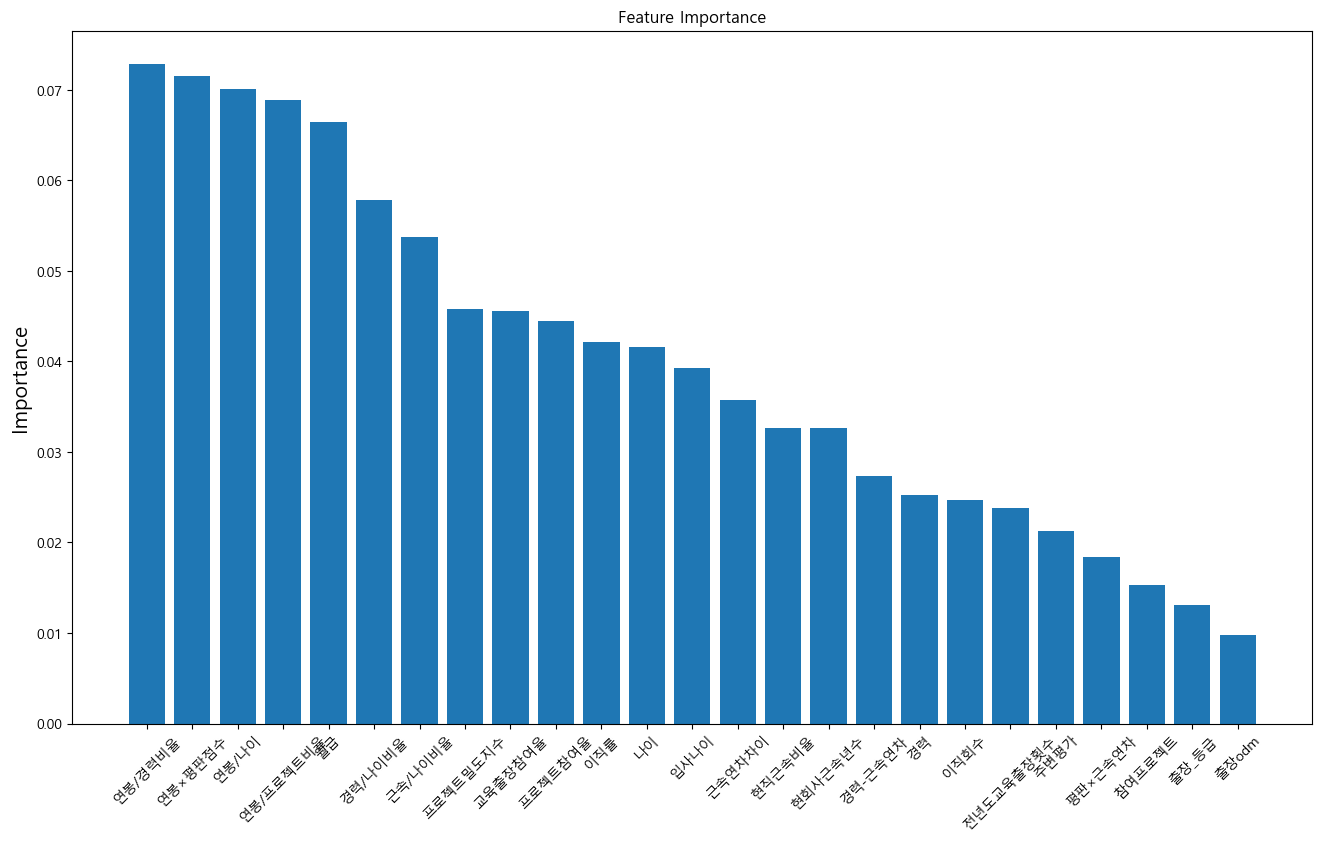

In [312]:
# features
plt.figure(figsize=(16,9))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Importance', fontsize=15)
plt.title("Feature Importance")
plt.show()

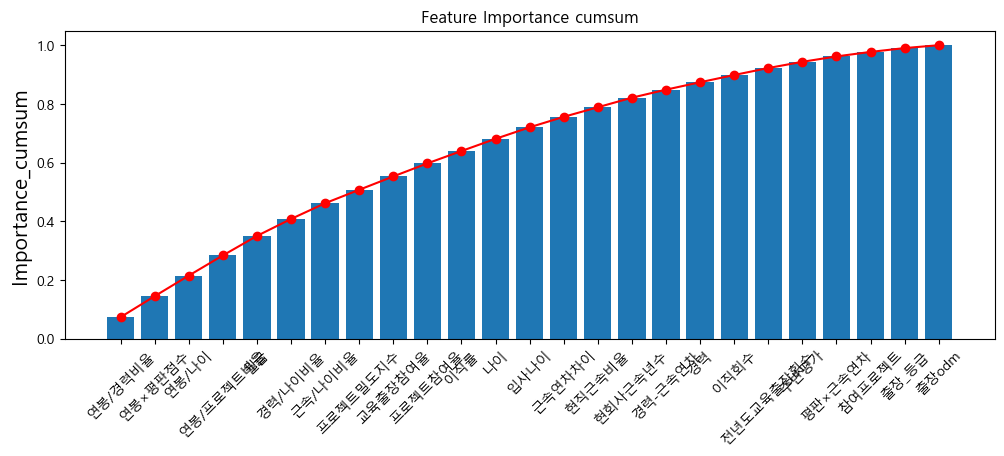

In [313]:
# features.importance 누적합

y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

plt.figure(figsize=(12,4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red',marker='o')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Importance_cumsum', fontsize=15)
plt.title("Feature Importance cumsum")
plt.show()

# 전체를 스케일링하며 출장_등급, 출장 odm(출장 내용 제거)

In [316]:
X_data = data_odm.drop(['업무평가odm','출장','업무평가',"근속연차",'출장_등급','출장odm'], axis=1)
stats_df = X_data.describe()
stats_df

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이
count,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.729932,8.778957e+06,2.693197,2.712245,11.279592,2.799320,7.008163,0.333061,0.458498,0.482892,0.678074,9.542677e+05,3.563946e+06,9.215646,-4.944218,0.941390,5.623810,2.398836e+07,0.288007,0.055482,230772.805763,25.644218
std,9.135373,0.711561,6.355742e+06,2.498009,1.081209,7.780782,1.289271,6.126525,0.375760,0.596127,0.728310,0.328093,6.528975e+05,3.121243e+06,6.949229,5.613088,1.255813,4.007733,2.131130e+07,0.153429,0.024024,137495.271680,6.875481
min,18.000000,1.000000,1.362150e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.682125e+05,-1.000000,-37.000000,0.000000,1.000000,1.620000e+06,0.000000,0.016949,48645.000000,18.000000
25%,30.000000,2.000000,3.929850e+06,1.000000,2.000000,6.000000,2.000000,3.000000,0.100000,0.166667,0.150000,0.411765,5.525598e+05,1.539338e+06,5.000000,-7.000000,0.333333,3.000000,9.520875e+06,0.181818,0.035714,125834.482759,20.000000
50%,36.000000,3.000000,6.640650e+06,2.000000,3.000000,10.000000,3.000000,5.000000,0.200000,0.300000,0.272727,0.800000,8.070075e+05,2.443950e+06,7.000000,-4.000000,0.571429,4.000000,1.656720e+07,0.264706,0.052632,190309.821429,24.000000
75%,43.000000,3.000000,1.131165e+07,4.000000,4.000000,15.000000,3.000000,9.000000,0.444444,0.500000,0.500000,1.000000,1.135223e+06,4.540050e+06,13.000000,-1.000000,1.000000,8.000000,3.015934e+07,0.400000,0.071429,301678.969003,30.000000
max,60.000000,4.000000,2.699865e+07,9.000000,4.000000,40.000000,6.000000,40.000000,3.000000,4.000000,6.000000,1.000000,4.041900e+06,2.696355e+07,37.000000,5.000000,9.000000,20.000000,1.076922e+08,0.689655,0.137931,750600.000000,56.000000


In [317]:
X_data

,나이,참여프로젝트,월급,이직회수,주변평가,경력,전년도교육출장횟수,현회사근속년수,이직률,프로젝트참여율,교육출장참여율,현직근속비율,연봉/경력비율,연봉/프로젝트비율,경력-근속연차,근속연차차이,프로젝트밀도지수,평판×근속연차,연봉×평판점수,경력/나이비율,근속/나이비율,연봉/나이,입사나이
0,41,3,8090550,8,1,8,0,6,1.000000,0.375000,0.000000,0.750000,1.011319e+06,2696850.0,6,-4,0.375000,2,8090550,0.195122,0.048780,197330.487805,33
1,49,2,6925500,1,4,10,3,10,0.100000,0.200000,0.300000,1.000000,6.925500e+05,3462750.0,8,-8,0.500000,8,27702000,0.204082,0.040816,141336.734694,39
2,37,2,2821500,6,2,7,3,0,0.857143,0.285714,0.428571,0.000000,4.030714e+05,1410750.0,6,1,0.714286,2,5643000,0.189189,0.027027,76256.756757,30
3,33,3,3927150,1,3,8,3,8,0.125000,0.375000,0.375000,1.000000,4.908938e+05,1309050.0,7,-7,0.750000,3,11781450,0.242424,0.030303,119004.545455,25
4,27,3,4681800,9,4,6,3,2,1.500000,0.500000,0.500000,0.333333,7.803000e+05,1560600.0,5,-1,1.000000,4,18727200,0.222222,0.037037,173400.000000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,4,3470850,4,3,17,3,5,0.235294,0.235294,0.176471,0.294118,2.041676e+05,867712.5,15,-3,0.411765,6,10412550,0.472222,0.055556,96412.500000,19
1466,39,2,13487850,4,1,9,5,7,0.444444,0.222222,0.555556,0.777778,1.498650e+06,6743925.0,6,-4,0.777778,3,13487850,0.230769,0.076923,345842.307692,30
1467,27,4,8291700,1,2,6,0,6,0.166667,0.666667,0.000000,1.000000,1.381950e+06,2072925.0,4,-4,0.666667,4,16583400,0.222222,0.074074,307100.000000,21
1468,49,2,7276500,2,4,17,3,9,0.117647,0.117647,0.176471,0.529412,4.280294e+05,3638250.0,15,-7,0.294118,8,29106000,0.346939,0.040816,148500.000000,32


In [318]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
data_scaled

array([[ 0.4463504 ,  0.37967213, -0.05778755, ..., -0.24330799,
         1.07022115, -0.16239918],
       [ 1.32236521, -1.02616674, -0.05778755, ..., -0.65068788,
         1.9431843 ,  1.71733935],
       [ 0.008343  , -1.02616674, -0.96148639, ..., -1.12417417,
         0.63373958, -0.16239918],
       ...,
       [-1.08667552,  1.78551099, -0.05778755, ...,  0.55531487,
        -0.67570515, -0.16239918],
       [ 1.32236521, -1.02616674, -0.05778755, ..., -0.59857189,
         0.92472729,  1.71733935],
       [-0.32016256,  1.78551099, -0.05778755, ..., -0.40675672,
         0.34275186, -0.16239918]])

In [319]:
Y=data_odm['업무평가odm']
Y

0       0
1       1
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: 업무평가odm, Length: 1470, dtype: int64

### test,train 데이터 분리

In [320]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,stratify=Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 23), (441, 23), (1029,), (441,))

## RandomForest:class_weight=None

In [321]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [322]:
pred = rf_model.predict(X_test)

In [323]:
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8435374149659864


In [324]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8435374149659864


예측값,0,1
실제값,,
0,371,2
1,67,1


### RandomForest 모델의 class_weight기능을 통해 구해보기

In [325]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [326]:
pred = rf_model.predict(X_test)
# pred, np.array(Y_test)
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))

scailing값으로 rf 정확도 : 0.8412698412698413


In [327]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8412698412698413


예측값,0,1
실제값,,
0,371,2
1,68,0


# 출장_등급, 출장odm 제거시 precision이 다시 낮아짐

# voting_model 체크

In [346]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from lightgbm import LGBMClassifier

rf = RandomForestClassifier(class_weight='balanced')
bag = BaggingClassifier()
lgbm = LGBMClassifier()

In [347]:
%%time
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('rfm',rf),
                                           ('bag',bag),
                                           ('lgb',lgbm)],
                               voting='hard',
                               n_jobs=-1)

voting_model.fit(X_train,Y_train)

CPU times: total: 62.5 ms
Wall time: 7.13 s


,estimators,"[('rfm', ...), ('bag', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [348]:
pred = voting_model.predict(X_test)
pred

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [349]:
from sklearn.metrics import accuracy_score
print("scailing값으로 rf 정확도 :",accuracy_score(np.array(Y_test),pred))
pd.crosstab(np.array(Y_test),pred,rownames=['실제값'],colnames=['예측값'])

scailing값으로 rf 정확도 : 0.8276643990929705


예측값,0,1
실제값,,
0,365,8
1,68,0
